In [1]:
from sklearn.datasets import make_moons
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib as mpl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\eequa\Anaconda3\envs\ai\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\eequa\AppData\Local\Temp\ipykernel_4088\3664249887.py:20: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],


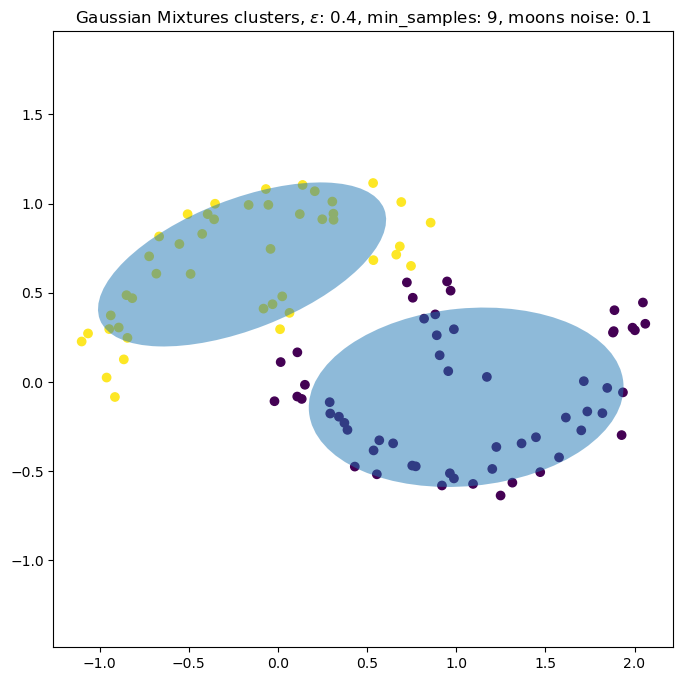

In [2]:
# Ellipse visualization from sklearn documentation:
# https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html#sphx-glr-auto-examples-mixture-plot-gmm-covariances-py

def make_ellipses(gmm, ax):
#     colors = ['red', 'green']
    for n in range(gmm.covariances_.shape[0]):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle) #, color=colors[n])
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')

from sklearn.mixture import GaussianMixture

noise = 0.1
X, y = make_moons(n_samples=100, noise=noise, random_state=0)
eps = 0.4
min_samples = 9
gm = GaussianMixture(n_components = 2,
                     covariance_type = 'full', # 'tied', 'diag', 'spherical'
                     tol = 0.001, # lower bound gain that EM optimizess until
                     reg_covar = 1e-6, # Regularization added to diag. of covariance matrix
                                      # so that they're all positive
                     max_iter = 100,
                     n_init = 1,
                     init_params = 'kmeans', # 'random'
                     weights_init = None, # weights for different distributions shape: (n_components,)
                     means_init = None, # custom initialization for all the means, shape: (n_components, n_features)
                     precisions_init = None, # custom initialization for precision, shape depends on covariance_type
                     random_state = None,
                     warm_start = False,
                     verbose = 0, # higher is more output
                     verbose_interval = 10) # number of iterations between subsequent verbose based outputs
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
plt.scatter(X[:, 0], X[:, 1], c=gm.fit_predict(X))
plt.title(f'Gaussian Mixtures clusters, $\epsilon$: {eps}, min_samples: {min_samples}, moons noise: {noise}')
make_ellipses(gm, ax)
plt.show()

In [3]:
print(gm.weights_) # weights of each component
print(gm.means_) # means of each distribution
print(gm.covariances_) # covariances of each distribution
print(gm.precisions_) # precision matrix of each distribution
print(gm.converged_) # if converged
print(gm.n_iter_) # number of iterations training ran for
print(gm.lower_bound_) # lower bound of log-likelihood of EM process on our training data for our current model

[0.55788393 0.44211607]
[[ 1.05582692 -0.08642171]
 [-0.20105347  0.65845534]]
[[[0.38957679 0.02524777]
  [0.02524777 0.12653435]]

 [[0.32640341 0.10129644]
  [0.10129644 0.10581424]]]
[[[ 2.60051629 -0.51888873]
  [-0.51888873  8.0065279 ]]

 [[ 4.3585922  -4.17249959]
  [-4.17249959 13.44487595]]]
True
5
-1.7636663981308354


In [4]:
print(gm.aic(X))
print(gm.bic(X))

374.67430135713755
403.3311734030066


In [5]:
# gm.predict(X)
# gm.predict_proba(X)

In [6]:
print(gm.score(X))  # avg. log-likelihood over samples
print(gm.score_samples(X).shape)  # log prob. density per sample

-1.7633715067856877
(100,)


C:\Users\eequa\AppData\Local\Temp\ipykernel_4088\3664249887.py:20: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],


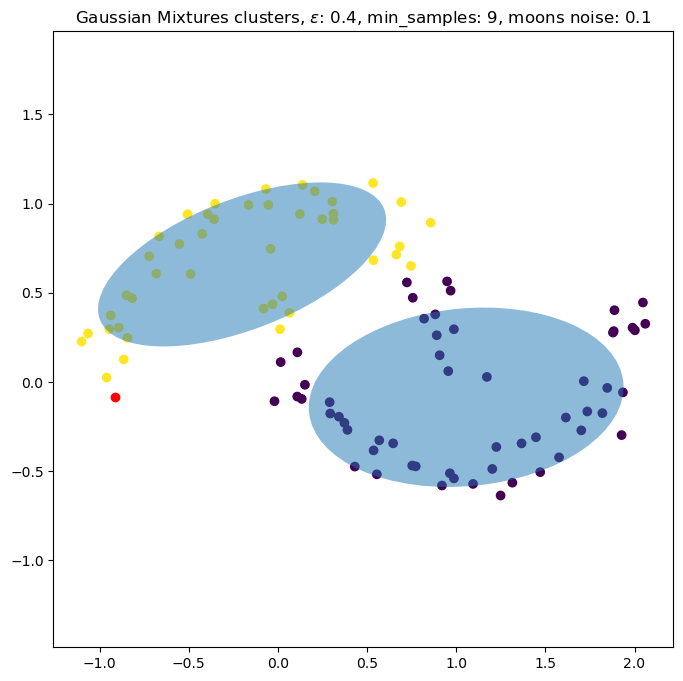

In [7]:
logProbDensities = gm.score_samples(X)
sortedVals = np.array(sorted([[x, y] for x, y in zip(logProbDensities, range(len(logProbDensities)))],
                             key = lambda x: x[0]))
percent = 1
outliers = sortedVals[:int(len(sortedVals) / 100*percent),1]
notOutliers = sortedVals[int(len(sortedVals) / 100*percent):,1]
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
plt.scatter(X[outliers.astype(int), 0], X[outliers.astype(int), 1], c='red')
plt.scatter(X[notOutliers.astype(int), 0], X[notOutliers.astype(int), 1], c=gm.predict(X[notOutliers.astype(int)]))
plt.title(f'Gaussian Mixtures clusters, $\epsilon$: {eps}, min_samples: {min_samples}, moons noise: {noise}')
make_ellipses(gm, ax)
plt.show()

In [8]:
print(gm.sample(n_samples=5)) # generate samples from our distributions

(array([[ 0.82012586, -0.26111629],
       [ 0.3820151 , -0.38016167],
       [-0.0951505 ,  0.68054352],
       [-0.48769813,  0.33006894],
       [-0.36824816,  0.75167821]]), array([0, 0, 1, 1, 1]))


In [9]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=2,
                              covariance_type='full',
                              tol=0.001,
                              reg_covar=1e-6,
                              max_iter=100,
                              n_init=1,
                              init_params='kmeans',
                              # control prior probability structure
                              weight_concentration_prior_type='dirichlet_process',
                              # 'dirichlet_distribution' <- leads to more uniforms weights across the different 
                              # gaussian distributions
                              weight_concentration_prior=None, 
                              mean_precision_prior=None, # float, controls where distributions can be placed
                              # larger values lead to distributions grouping around mean_prior
                              mean_prior=None, # (n_features,), priot mean distribution, otherwise set to mean of
                              # each feature in X
                              degrees_of_freedom_prior=None, # prior for d.o.f. for cov. matrix
                              covariance_prior=None, # prior on cov. matrix, shape depends on cov. type
                              random_state=None,
                              warm_start=False,
                              verbose=0,
                              verbose_interval=10)

C:\Users\eequa\Anaconda3\envs\ai\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\eequa\AppData\Local\Temp\ipykernel_4088\3664249887.py:20: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],


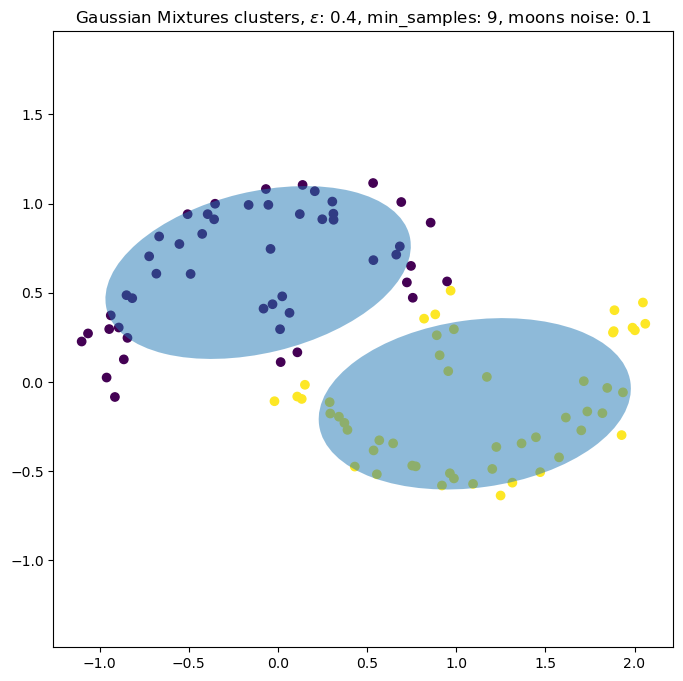

In [10]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
plt.scatter(X[:, 0], X[:, 1], c=bgm.fit_predict(X))
plt.title(f'Gaussian Mixtures clusters, $\epsilon$: {eps}, min_samples: {min_samples}, moons noise: {noise}')
make_ellipses(bgm, ax)
plt.show()